In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing dataset from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## About dataset
   
   

> **CAR Evaluation Dataset** 

---
*Attributes:*

   - PRICE                  overall price
        - *buying* :              buying price
        - *maint* :              price of the maintenance
   - TECH                   technical characteristics
    
    *COMFORT*
      - *doors* :            number of doors
      - *persons* :           capacity in terms of persons to carry
      - *lug_boot* :          the size of luggage boot
      - safety :              estimated safety of the car


In [ ]:
path = "/content/drive/My Drive/Kaggle/Car Evalution dataset/car.data"
df = pd.read_csv(path,names=["buying", "maint","door", "persons","lug_boot","safety","class"])

In [ ]:
df.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
df.persons.describe() #not integer

count     1728
unique       3
top          4
freq       576
Name: persons, dtype: object

In [ ]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)


## Pre- Processing data



In [ ]:
pre_process=preprocessing.LabelEncoder()

In [ ]:
"""Coverting non numeric data to numeric
    All of them are non-numeric """
df.buying=pre_process.fit_transform(list(df.buying)) 
df.maint=pre_process.fit_transform(list(df.maint)) 
df.door=pre_process.fit_transform(list(df.door)) 
df.persons=pre_process.fit_transform(list(df.persons)) 
df.lug_boot=pre_process.fit_transform(list(df.lug_boot)) 
df.safety=pre_process.fit_transform(list(df.safety)) 
df['class']=pre_process.fit_transform(list(df['class'])) 

In [ ]:
df.head()

,buying,maint,door,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


<Figure size 864x576 with 0 Axes>

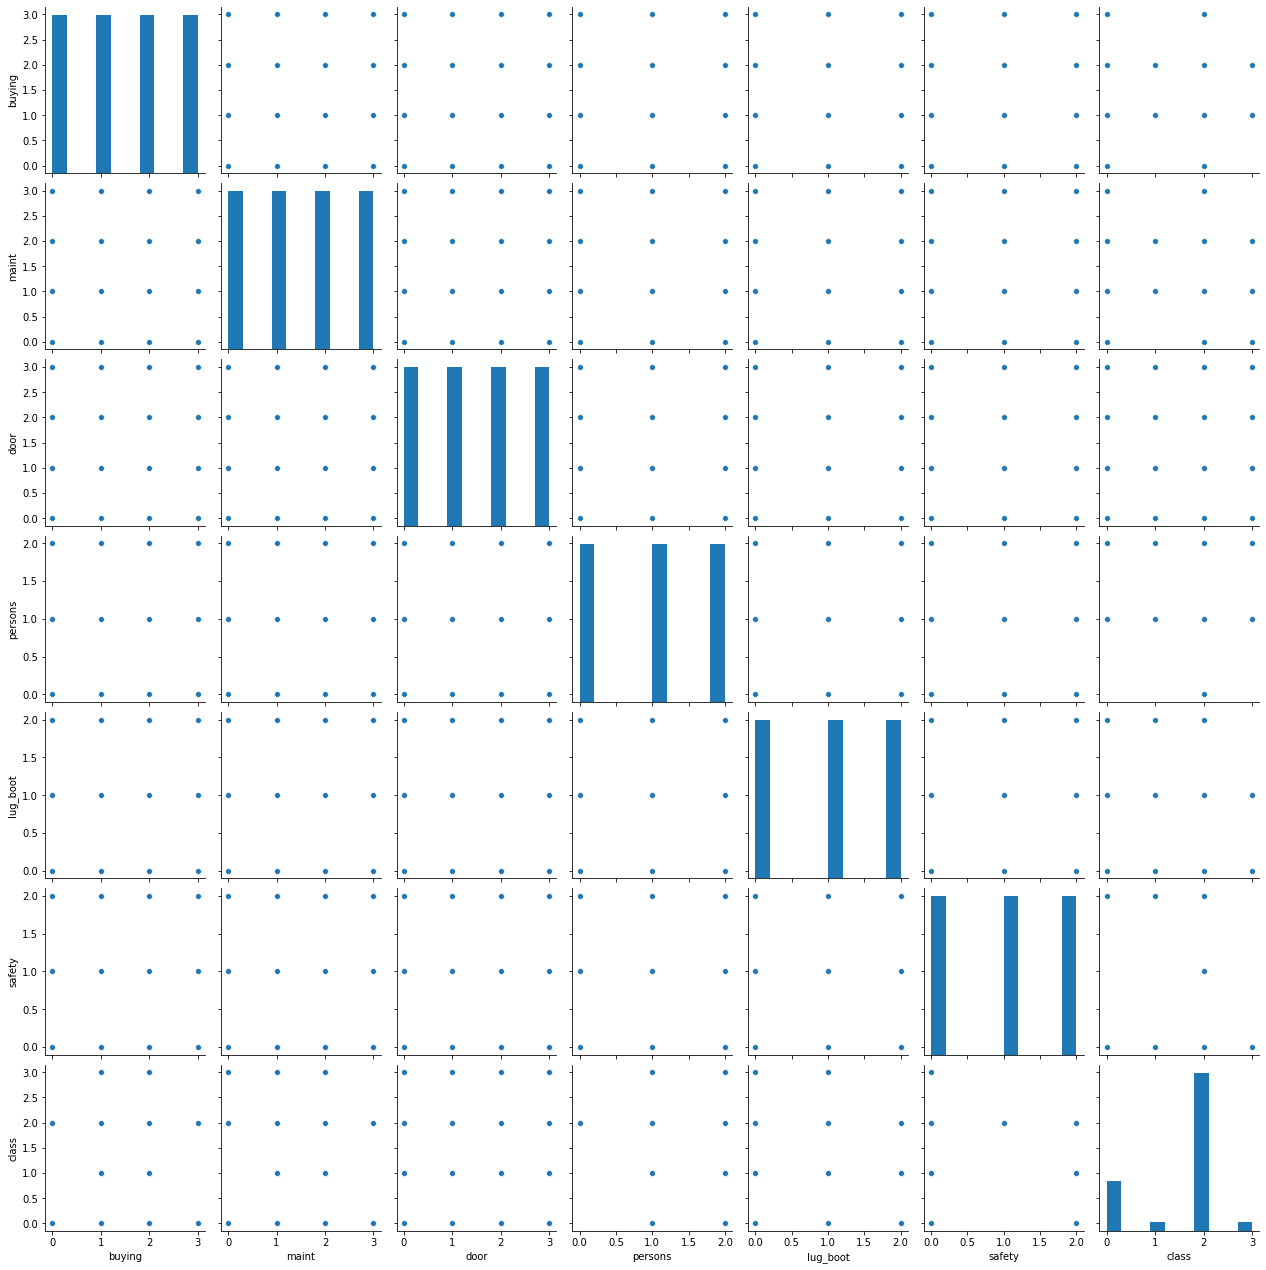

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df)

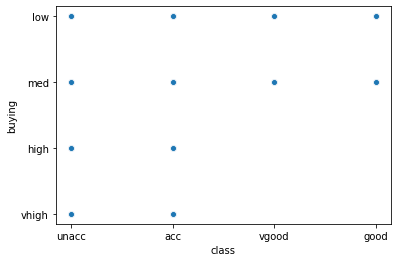

In [ ]:
sns.scatterplot(x=df['class'],y=df['buying'])

In [ ]:
y=df['class']
X=df.drop('class',axis=1)

In [ ]:
df['class'].unique()

array([2, 0, 3, 1])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Training

In [ ]:
model=KNeighborsClassifier(n_neighbors=7)

In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
accuracy=model.score(X_test,y_test)

In [ ]:
accuracy

0.9508670520231214

Testing

In [ ]:
y_pred=model.fit_predict()

AttributeError: ignored

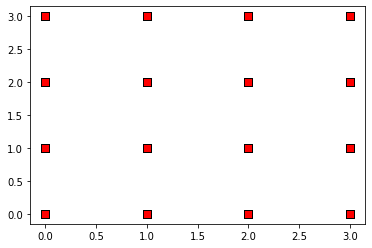

In [ ]:
plt.scatter(
    X_test.iloc[y_pred == 0,0],X_test.iloc[y_pred == 0,1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.scatter(
    X_test.iloc[y_pred == 1,0],X_test.iloc[y_pred == 1,1],
    s=50, c='blue',
    marker='s', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    X_test.iloc[y_pred == 2,0],X_test.iloc[y_pred == 2,1],
    s=50, c='red',
    marker='s', edgecolor='black',
    label='cluster 3'
)

In [ ]:
y_pred.shape

(346,)

In [ ]:
y_pred[y_test==y_pred].shape

(329,)